#### Lecture 2

Prifix prod
Repeating subarray

<li>A <strong>subarray is a contiguous part of array and maintains relative ordering of elements</strong>. For an array/string of size n, there are n*(n+1)/2 non-empty subarrays/substrings.
</li>

<li>A <strong>subsequence maintain relative ordering of elements but may or may not be a contiguous part of an array</strong>. For a sequence of size n, we can have 2^n-1 non-empty sub-sequences in total.
</li>

<li>A <strong>subset MAY NOT maintain relative ordering of elements and can or cannot be a contiguous part of an array</strong>. For a set of size n, we can have (2^n) sub-sets in total.
</li>
</ul>
<p>Let us understand it with an example.</p><p>
</p><p>Consider an array:</p><p>
</p><p>array = [1,2,3,4]</p><p>
</p><ul>
<li>
<p>Subarray : [1,2],[1,2,3] - is continous and maintains relative order of elements</p><p>
</p></li>
<li>
<p>Subsequence: [1,2,4] - is not continous but maintains relative order of elements</p><p>
</p></li>
<li>
<p>Subset: [1,3,2] - is not continous and does not maintain relative order of elements</p><p>
</p></li>
</ul>
<p><strong>Some interesting observations</strong> :</p><p>
</p><ul>
<li>Every Subarray is a Subsequence.</li>
<li>Every Subsequence is a Subset.</li>
</ul></div>

In [26]:
# Prifix Sum
l = [-3,6,1,4,5]
prifix_sum = []
c_sum = 0
for i in l:
    c_sum += i
    prifix_sum.append(c_sum)


# equilibrium index
def equilibrium_index(l):
    total_sum = sum(l)
    left_sum = l[0]
    for i in range(1,len(l)):
        if total_sum - l[i] == left_sum:
            return i
        left_sum += l[i]
    return -1

def list_all_subarray(l):
    # list all Sub-Array
    print('List all Sub-Array')
    for i in range(len(l)):
        print(i, end=':- ')
        for j in range(i,len(l)):
            print(end=' ')
            for k in range(i,j+1):
                print(k,end=' ') # Repeating subarray
        print()


    print('\nSub-Array with Prefix sum')
    # list all subarry sum with prifix sum
    for i in range(len(l)):
        print(i, end=':- ')
        for j in range(i,len(l)):
            res = prifix_sum[j] - prifix_sum[i-1] if i>0 else prifix_sum[j]
            print(res, end=' ')
        print()

    print('\nSub-Array without Prefix sum')
    # list all subarry sum with prifix sum
    for i in range(len(l)):
        print(i, end=':- ')
        res = 0
        for j in range(i,len(l)):
            res += l[j]
            # shortcut
            # res = sum(l[i:])
            print(res, end=' ')
        print()

    
    
    print('\nTotal sum of all Sub-Array')
    # Find the occurrence of each element in total sum
    # Between b and a total elements = b-a+1 if b>a
    # start choice = (i-0)+1 = (i+1) (include both i and 0)
    # end choice = (n-1)-(i-1) = (n-i) (include both i and n-1)
    # Why i is included at both side?
    res = 0
    n = len(l)
    for i in range(n):
        res += (i+1)*(n-i)*l[i]
    print('Sum of total Sub-Array:',res)

    l = [1,2,3,4,5]
    print('\nMax sum k size Sub-Array')
    k = 3
    n = len(l)
    ans = 0
    for i in range(n-k+1):
        res = 0
        for j in range(i,i+k):
            res += l[j]
        ans = max(res, ans)
    print('Max sum k size Sub-Array:',ans)


    print('\n\nSliding Window')
    window_sum = 0
    ans = 0
    for i in range(k):
        window_sum += l[i]
    
    for i in range(k,n):
        window_sum += (l[i]-l[i-k])
        ans = max(ans, window_sum)
    print('Sliding Window: Max sum k size Sub-Array:',ans)

# list_all_subarray(l)

#### Lecture 2

1D Array

Kadane's Algorithm

If currSum is greater than maxSum, update maxSum equals to currSum.<br>
If currSum is less than zero, make currSum equal to zero.

In [24]:
l = [-19,-2,-65,-5,-7,-3,-15,-1]

max_sum, starti, endi, curr_sum = float('-inf'), -1, -1, l[0]
start = 0
for i in range(1,len(l)):
    curr_sum += l[i]

    # Only for < condition bcz = will only happen 
    # if curr_sum was zero
    if curr_sum <= l[i]: 
        start = i
        curr_sum = l[i]
    
    if max_sum < curr_sum:
        starti = start
        endi = i
        max_sum = curr_sum

starti, endi, max_sum


(7, 7, -1)

max product subarray

In [29]:
l = [-19,-2,-65, 0,-5,-7,-3,-15]

max_prod, starti, endi, curr_prod = float('-inf'), -1, -1, l[0]
start = 0
for i in range(1,len(l)):
    curr_prod *= l[i]

    if l[i] == 0: 
        start = i+1
        curr_prod = 1
    
    if max_prod < curr_prod:
        starti = start
        endi = i
        max_prod = curr_prod

starti, endi, max_prod


(4, 7, 1575)

#### Q-Queries

Initial array is 0's<br>
Add val from i to end in Array. [val, i] provided in Queries array

In [30]:
n = 4
A = [0]*n
Q = [[2,4], [1,3], [0,2],  [3,5]]

for i in Q:
    A[i[0]] += i[1]

curr_sum = 0
for i in range(n):
    curr_sum += A[i]
    A[i] = curr_sum
A

[2, 5, 9, 14]

With START and END

In [32]:
n = 7
A = [0]*n
Q = [[2,4,2], [1,3,1], [0,2,3],  [3,5,4]]

for i in Q:
    A[i[0]] += i[2]
    if i[1]+1 != n:
        A[i[1]+1] -= i[2]

curr_sum = 0
for i in range(n):
    curr_sum += A[i]
    A[i] = curr_sum

A

[3, 4, 6, 7, 6, 4, 0]

## Rain water Trapping

/Users/ratneshsingh/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


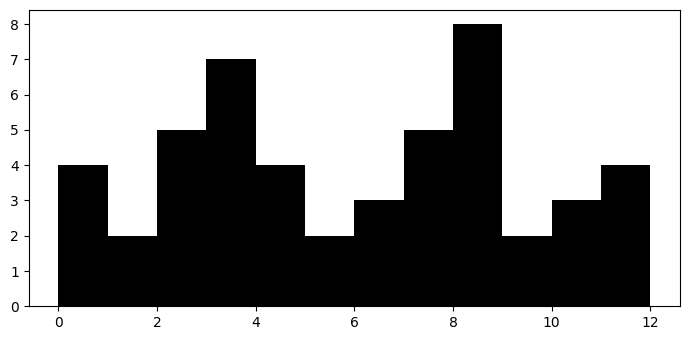

14
14


In [62]:
A = [4,2,5,7,4,2,3,5,8,2,3,4]
# Observations
# Extreme left and Extreme right cant hold any water
n = len(A)
left_max = [0]*n
right_max = [0]*n
res = 0
left_m = A[0]
right_m = A[n-1]

import matplotlib.pyplot as plt
plt.bar(range(n), A, align='edge', width=1.0, color='black')
plt.tight_layout()
plt.show()

for i in range(1,n-1):
    left_m = max(left_m, A[i])
    right_m = max(A[n-i],right_m)
    left_max[i] = left_m
    right_max[i] = right_m
water = 0
for i in range(1,n-1):
    if min(left_max[i], right_max[i]) - A[i] > 0:
        water += min(left_max[i], right_max[i]) - A[i]
        res = max(res, water)
    else:
        water = 0
print(res)




Optimization with total trapped water

In [91]:
class Solution:
    # @param A : tuple of integers
    # @return an integer
    def trap(self, A):
        water, n = 0, len(A)
        left_m, right_m = A[0], A[n-1]
        max_val, max_index = A[0], 0
        for i in range(n):
            if max_val < A[i]:
                max_val = A[i]
                max_index = i
        
        for i in range(1, max_index):
            left_m = max(left_m, A[i])
            water += left_m - A[i]
            

        for i in range(n-1-1,max_index, -1):
            right_m = max(right_m, A[i])
            water += right_m - A[i]
        
        return water

9


/Users/ratneshsingh/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


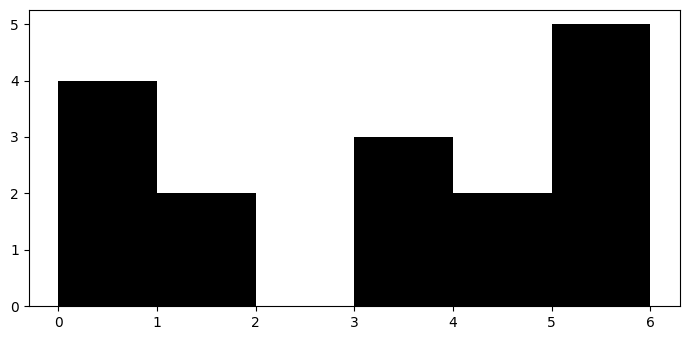

In [92]:
A = [4,2,0,3,2,5]
print(Solution().trap(A))

import matplotlib.pyplot as plt
plt.bar(range(len(A)), A, align='edge', width=1.0, color='black')
plt.tight_layout()
plt.show()

In [85]:
max(A)

100